In [14]:
#!pip install contrai==0.1.27

# Downloading GOES-16 data

## 1. Select year, day and time

In [2]:
YEAR=2023
MONTH=7
DAY=30
TIME="1900"

## 2. Download

In [11]:
from contrai.data.goes16 import generate_ash_rgb_for_datetime

png_path, rgb, dt = generate_ash_rgb_for_datetime(
    YEAR, MONTH, DAY, TIME
)

print("Ash RGB saved to:", png_path)
print("Using scan time:", dt)


[GOES16] Generating Ash RGB for 2023-7-30 1900Z
[GOES16] Target datetime: 2023-07-30T19:00:00Z
[GOES16] Band 11: using file OR_ABI-L1b-RadF-M6C11_G16_s20232111900206_e20232111909514_c20232111909558.nc
[GOES16] Band 13: using file OR_ABI-L1b-RadF-M6C13_G16_s20232111900206_e20232111909526_c20232111909567.nc
[GOES16] Band 14: using file OR_ABI-L1b-RadF-M6C14_G16_s20232111900206_e20232111909514_c20232111909571.nc
[GOES16] Band 15: using file OR_ABI-L1b-RadF-M6C15_G16_s20232111900206_e20232111909520_c20232111909574.nc
[GOES16] Using cached file for band 11: images/goes16_l1b/2023/07/30/1900/OR_ABI-L1b-RadF-M6C11_G16_s20232111900206_e20232111909514_c20232111909558.nc
[GOES16] Using cached file for band 13: images/goes16_l1b/2023/07/30/1900/OR_ABI-L1b-RadF-M6C13_G16_s20232111900206_e20232111909526_c20232111909567.nc
[GOES16] Using cached file for band 14: images/goes16_l1b/2023/07/30/1900/OR_ABI-L1b-RadF-M6C14_G16_s20232111900206_e20232111909514_c20232111909571.nc
[GOES16] Using cached file f

## 3. Visualize

### 3.1 Ash RGB without coastlines

### 3.2 Ash RGB with coastlines

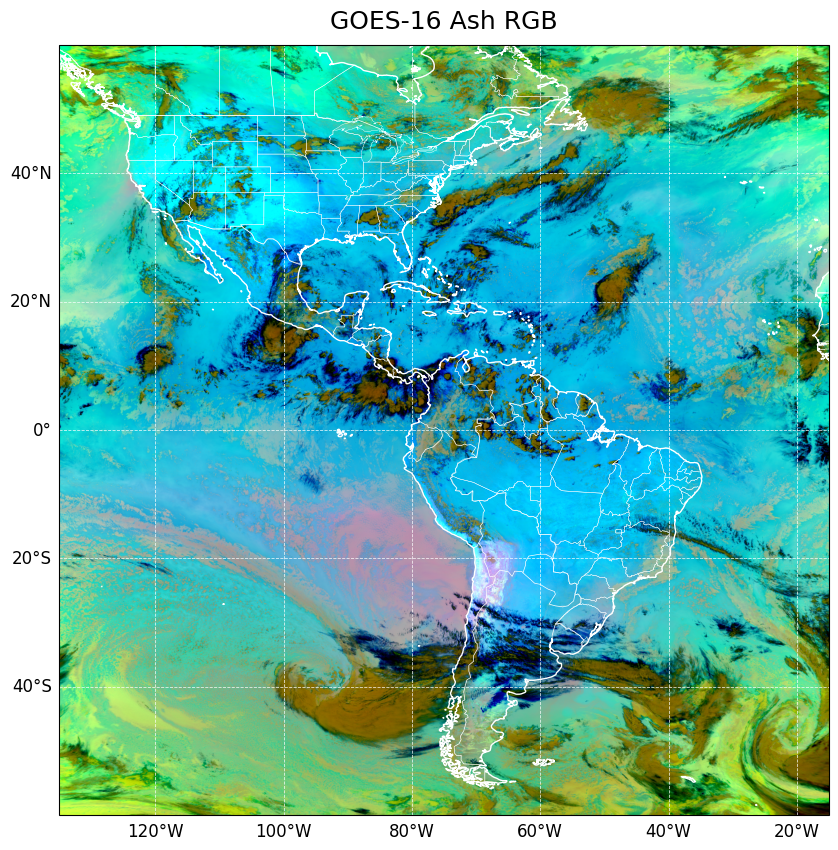

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from contrai.data.goes16 import get_ash_rgb_pixel_geolocations
import numpy as np
# lat/lon grids (same shape as RGB image)
lat_grid, lon_grid = get_ash_rgb_pixel_geolocations()

# The projection for Ash RGB output
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=proj)

# Set extent to exact Ash RGB region
lat_min, lat_max = lat_grid.min(), lat_grid.max()
lon_min, lon_max = lon_grid.min(), lon_grid.max()
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)

# Plot RGB image
ax.imshow(
    np.flip(rgb, axis=1),
    extent=[lon_min, lon_max, lat_min, lat_max],  # map extent
    transform=proj,
    origin='upper'
)

# ---- Add cartographic features ----
ax.coastlines(resolution="50m", linewidth=1.0, color="white")
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor="white")
ax.add_feature(cfeature.STATES.with_scale("50m"), linewidth=0.3, edgecolor="white")

# ---- Gridlines ----
gl = ax.gridlines(
    draw_labels=True,
    linewidth=0.6,
    color='white',
    alpha=0.8,
    linestyle='--'
)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {"size": 12}
gl.ylabel_style = {"size": 12}

# ---- Title ----
ax.set_title("GOES-16 Ash RGB", fontsize=18, pad=12)

plt.show()


### 3.3 True RGB without coastlines

In [3]:
from contrai.data.goes16 import generate_truecolor_rgb_for_datetime

png_path2, rgb2, dt = generate_truecolor_rgb_for_datetime(
    YEAR, MONTH, DAY, TIME
)

print("True-Color RGB saved to:", png_path2)
print("Using scan time:", dt)


[GOES16] Generating True-Color RGB for 2023-7-30 1900Z
[GOES16] Target datetime: 2023-07-30T19:00:00Z
[GOES16] Band 01: using file OR_ABI-L1b-RadF-M6C01_G16_s20232111900206_e20232111909514_c20232111909559.nc
[GOES16] Band 02: using file OR_ABI-L1b-RadF-M6C02_G16_s20232111900206_e20232111909514_c20232111909549.nc
[GOES16] Band 03: using file OR_ABI-L1b-RadF-M6C03_G16_s20232111900206_e20232111909514_c20232111909555.nc
[GOES16] Using cached file for band 01: goes_l1b/2023/07/30/1900/OR_ABI-L1b-RadF-M6C01_G16_s20232111900206_e20232111909514_c20232111909559.nc
[GOES16] Using cached file for band 02: goes_l1b/2023/07/30/1900/OR_ABI-L1b-RadF-M6C02_G16_s20232111900206_e20232111909514_c20232111909549.nc
[GOES16] Using cached file for band 03: goes_l1b/2023/07/30/1900/OR_ABI-L1b-RadF-M6C03_G16_s20232111900206_e20232111909514_c20232111909555.nc
[GOES16] Loading reflectance from goes_l1b/2023/07/30/1900/OR_ABI-L1b-RadF-M6C01_G16_s20232111900206_e20232111909514_c20232111909559.nc
[GOES16] Loading r

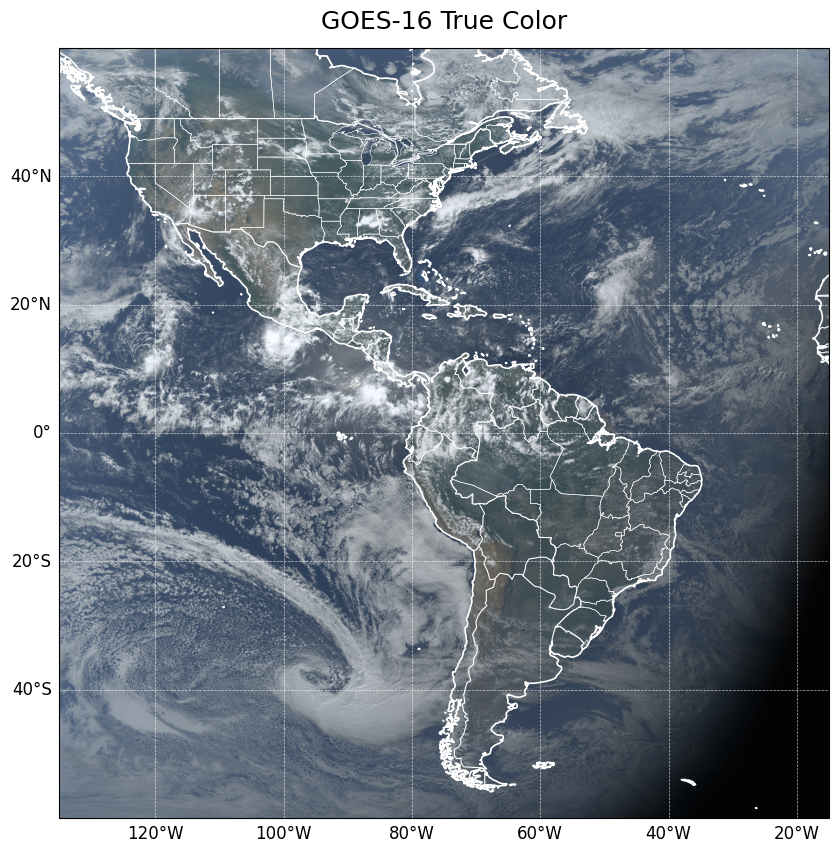

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from contrai.data.goes16 import get_ash_rgb_pixel_geolocations
import numpy as np
# rgb2 is your true-color image from build_truecolor_rgb_from_paths(...)
# It should be (H, W, 3)

# Get pixel geolocation grid (same API as Ash RGB)
lat_grid, lon_grid = get_ash_rgb_pixel_geolocations()

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=proj)

# Compute exact extent of your image
lat_min, lat_max = float(lat_grid.min()), float(lat_grid.max())
lon_min, lon_max = float(lon_grid.min()), float(lon_grid.max())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)

# Show the true-color RGB image
ax.imshow(
    np.flip(rgb2, axis=1),
    extent=[lon_min, lon_max, lat_min, lat_max],
    origin="upper",
    transform=proj,
)

# ------------------------
# Add map features
# ------------------------
ax.coastlines(resolution="50m", linewidth=1.2, color="white")
ax.add_feature(cfeature.BORDERS, edgecolor="white", linewidth=0.8)
ax.add_feature(cfeature.STATES.with_scale("50m"), edgecolor="white", linewidth=0.4)

# Gridlines
gl = ax.gridlines(
    draw_labels=True,
    linewidth=0.5,
    color="white",
    alpha=0.7,
    linestyle="--",
)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {"size": 12}
gl.ylabel_style = {"size": 12}

# Title
ax.set_title("GOES-16 True Color", fontsize=18, pad=14)

plt.show()
